<a href="https://colab.research.google.com/github/NicolasKlaue/Perceptron-to-classify-iris-types/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn import datasets
import tensorflow as tf
from keras.callbacks import TensorBoard
import numpy as np

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

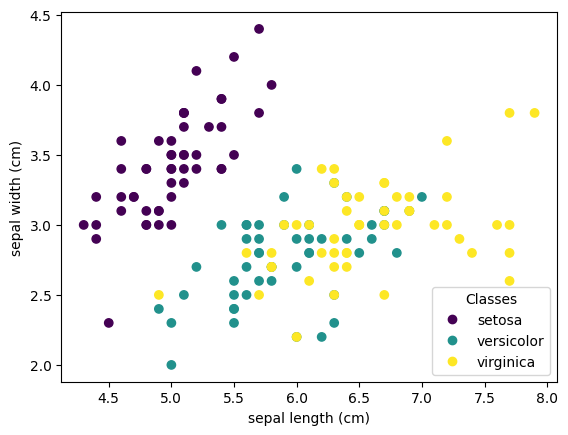

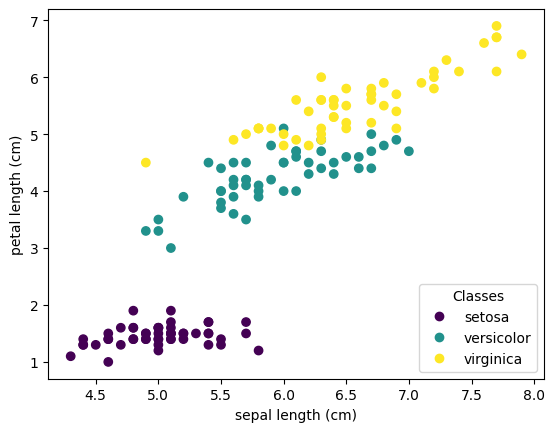

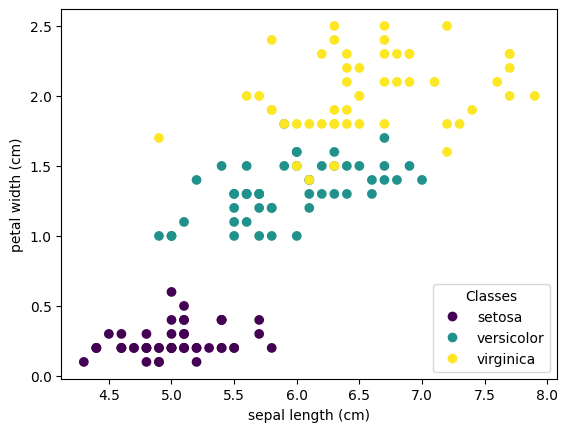

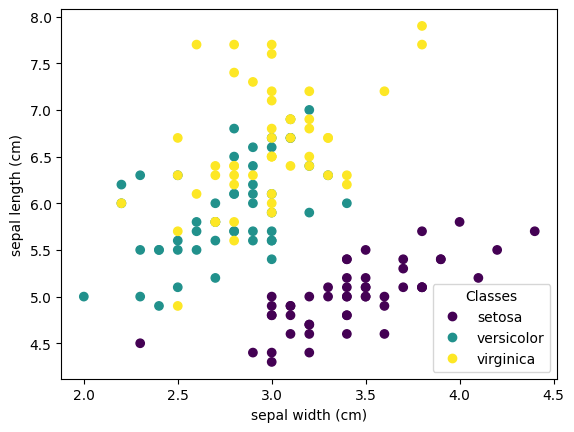

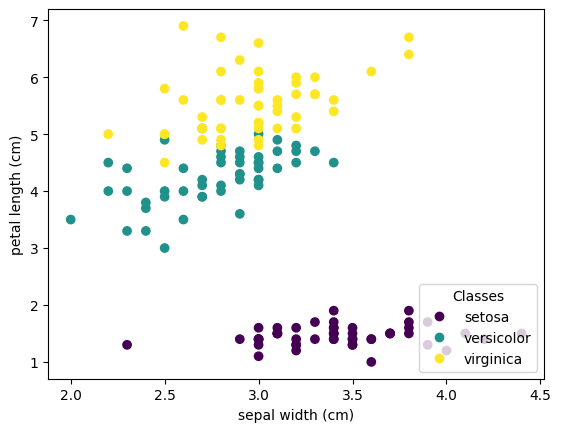

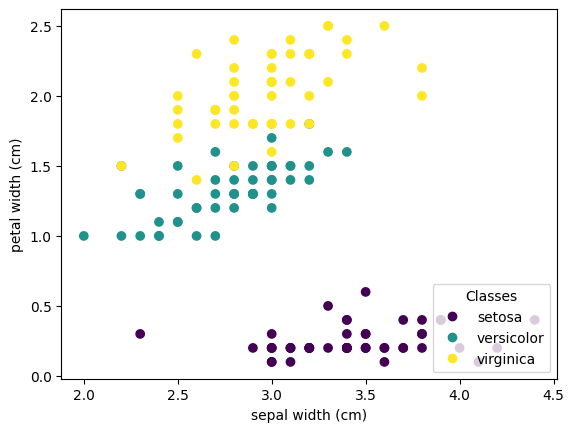

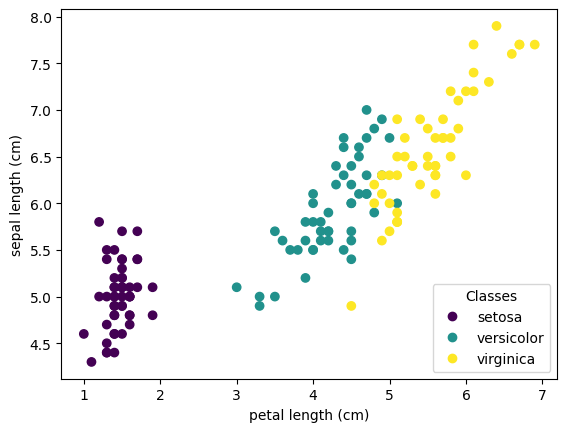

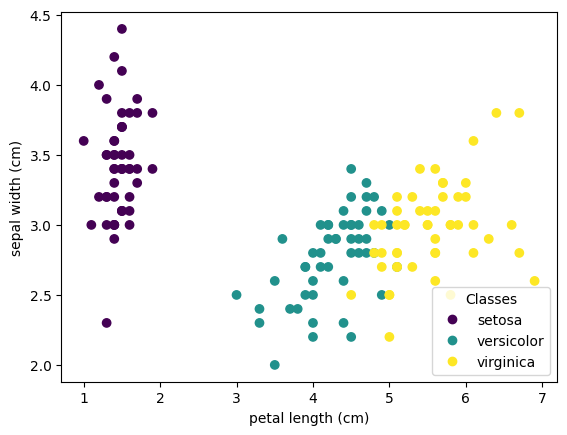

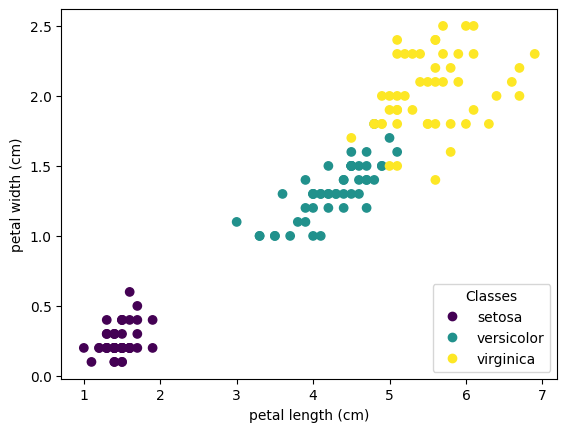

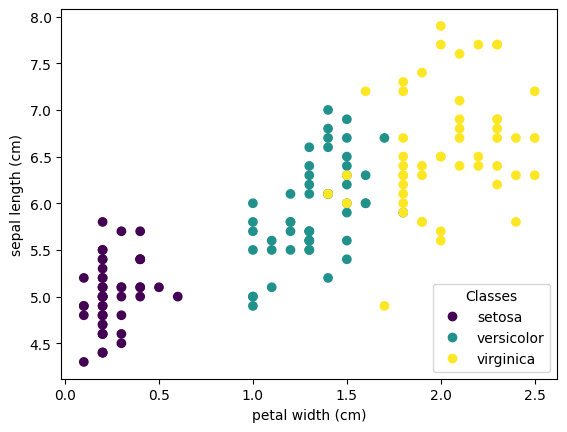

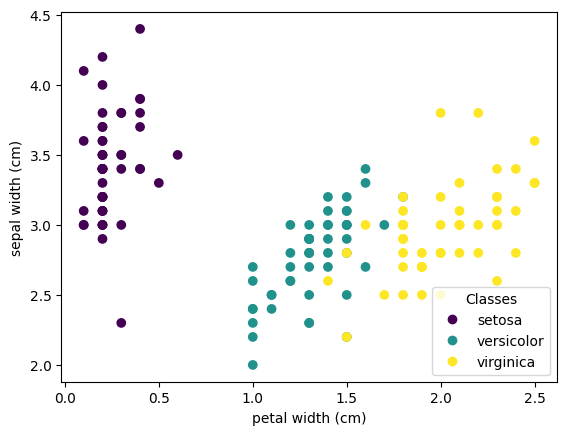

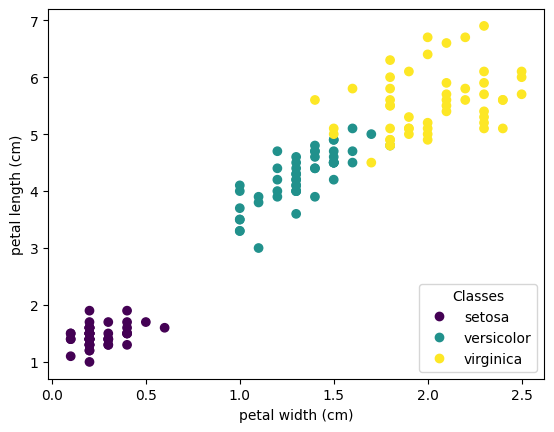

In [18]:
import matplotlib.pyplot as plt

for i in range(4):
  for j in range(4):
    if i != j:
      _, ax = plt.subplots()
      scatter = ax.scatter(iris.data[:, i], iris.data[:, j], c=iris.target)
      ax.set(xlabel=iris.feature_names[i], ylabel=iris.feature_names[j])
      _ = ax.legend(
          scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
      )

In [18]:
X_train = tf.convert_to_tensor([iris.data[:, "petal width"],iris.data[:, "petal length"]], np.float32)
y_train = tf.convert_to_tensor(iris.target, np.float32)

X_test = tf.convert_to_tensor(data_x, np.float32)
y_test = tf.convert_to_tensor(data_y, np.float32)